
Wyniki dla: Zbiór zad2
 - Random Forest: 0.9250
 - XGBoost (Tuned): 0.9250
 - Stacking: 1.0000

Wyniki dla: Zbiór Iris
 - Random Forest: 1.0000
 - XGBoost (Tuned): 1.0000
 - Stacking: 1.0000


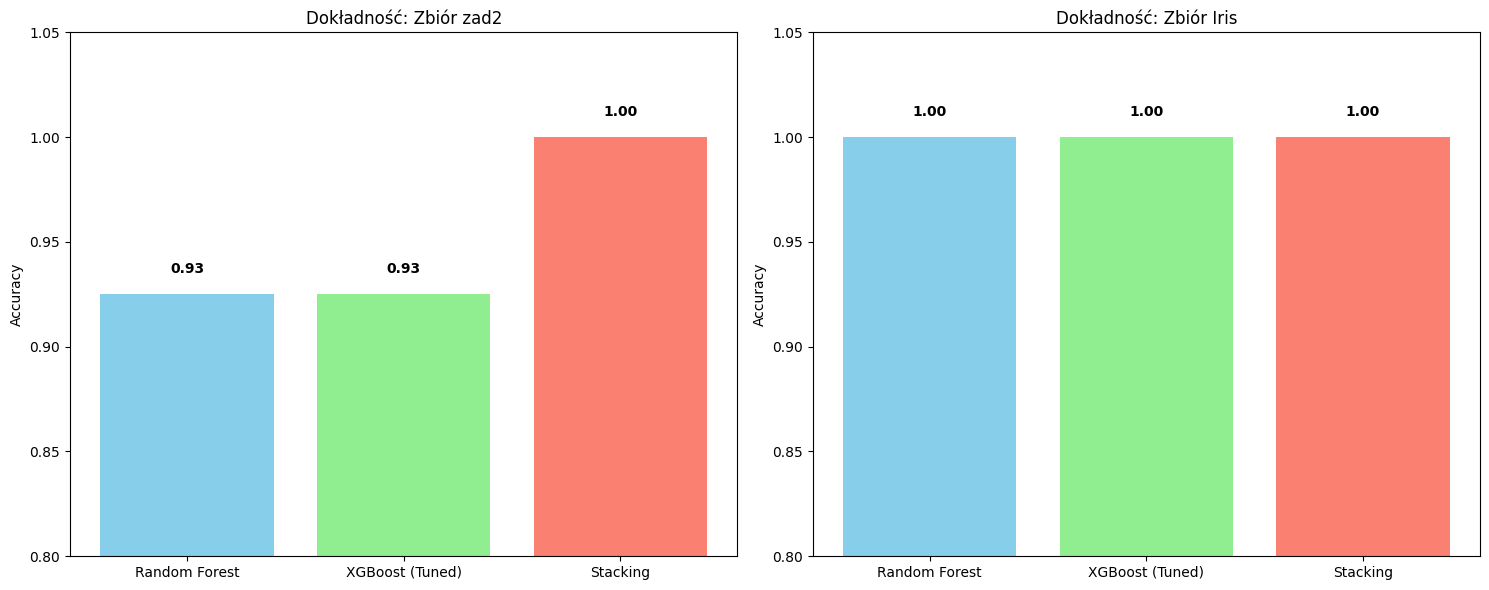

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


np.random.seed(42)
X_custom = np.random.randn(200, 2)
y_custom = (X_custom[:, 0] + X_custom[:, 1] > 0).astype(int)

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

datasets = [
    ("Zbiór zad2", X_custom, y_custom),
    ("Zbiór Iris", X_iris, y_iris)
]

param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

def get_trained_models(X_train, y_train):
    xgb_base = XGBClassifier(eval_metric='mlogloss', random_state=42)
    grid_search = GridSearchCV(xgb_base, param_grid_xgb, cv=3)
    grid_search.fit(X_train, y_train)
    best_xgb = grid_search.best_estimator_

    estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
    stacking = StackingClassifier(
        estimators=estimators, 
        final_estimator=LogisticRegression()
    )
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    return {
        "Random Forest": rf,
        "XGBoost (Tuned)": best_xgb,
        "Stacking": stacking
    }


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, (ds_name, X, y) in zip(axes, datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    trained_models = get_trained_models(X_train, y_train)
    results = {}
    
    print(f"\nWyniki dla: {ds_name}")
    for name, clf in trained_models.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f" - {name}: {acc:.4f}")
    
    ax.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_title(f'Dokładność: {ds_name}')
    ax.set_ylim(0.8, 1.05)
    ax.set_ylabel('Accuracy')
    for i, v in enumerate(results.values()):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()